# A2C - Advantage Actor Critic
---
In this notebook, we train A2C with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils import n_step_boostrap, make_multi_envs
from a2c_agent import A2CAgent, train_a2c
import pandas as pd

In [2]:
# Hyperparameters
ENV_NAME = 'Pendulum-v0'
ENV_SEED = 42
N_ENVS = 12
N_STEP_BOOSTRAP = 5

### 2. Instantiate the Environments and Agent

In [3]:
# Multiprocessing Environments
mp_envs = make_multi_envs(N_ENVS, ENV_NAME, ENV_SEED)

agent = A2CAgent(state_size=3, action_size=1, actor_hidden_size=128,
                 critic_hidden_size=(128, 64), random_seed=2)
# agent = Agent(state_size=3, action_size=1, actor_hidden_size=(128, 32),
#               critic_hidden_size=(128, 32), random_seed=2)

In [4]:
# Example of N_STEP Bootstrapping
initial_states = mp_envs.reset()
S, A, R, Sp, dones = n_step_boostrap(mp_envs, agent, initial_states, N_STEP_BOOSTRAP)

In [5]:
S.shape

(12, 5, 3)

### 3. Train the Agent with A2C

In [ ]:
# Train agent
scores_per_env = train_a2c(mp_envs, agent, episodes=1000, n_step=N_STEP_BOOSTRAP)

### 4. Plots Average Score Across Environements

In [6]:
# Scores Dataframe
scores_df = pd.DataFrame(scores_per_env)
scores_df.columns = ["env_{}".format(i) for i in range(1, scores_df.shape[-1] + 1)]
print(scores_df.shape)
scores_df.reset_index(inplace=True)
scores_df.head()

(1000, 12)


,index,env_1,env_2,env_3,env_4,env_5,env_6,env_7,env_8,env_9,env_10,env_11,env_12
0,0,-156.091651,-218.970998,-175.880730,-336.098452,-177.518672,-233.364247,-250.455673,-349.751028,-240.716534,-292.450493,-329.996070,-292.773891
1,1,-158.116845,-238.012958,-148.200905,-151.434465,-239.902652,-158.543074,-365.722155,-239.015477,-234.037872,-315.929682,-215.679423,-265.267966
2,2,-265.845180,-316.924333,-273.949714,-327.258768,-179.175713,-238.006554,-214.486118,-264.265604,-153.077863,-330.283936,-173.939816,-178.333756
3,3,-271.816820,-175.312030,-171.850980,-173.281171,-177.116813,-187.227241,-291.460385,-168.642982,-266.325549,-295.473410,-203.872184,-252.248837
4,4,-196.102871,-174.497273,-366.795503,-152.100394,-300.692619,-193.669359,-153.513189,-263.967079,-234.374733,-335.545151,-313.536018,-177.894233


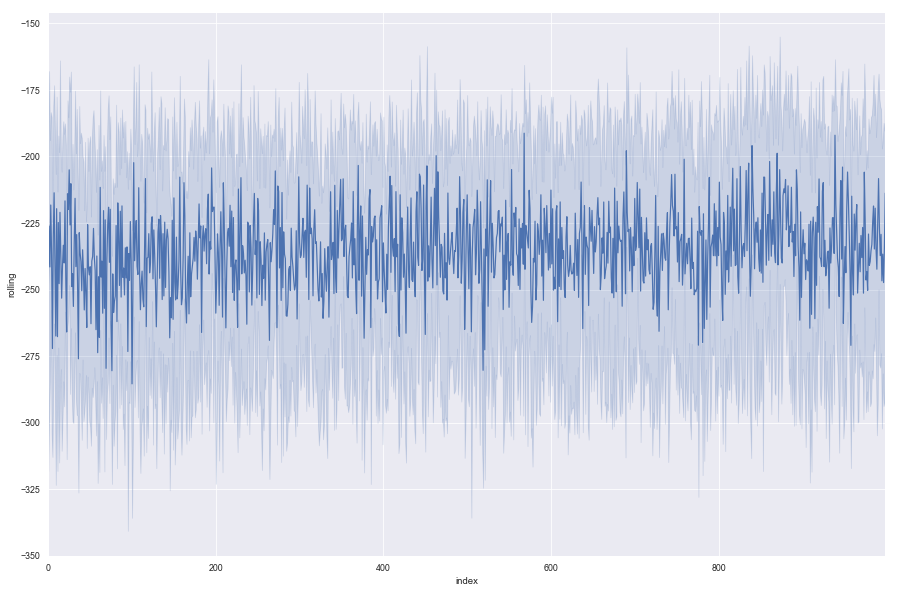

In [26]:
# Rewards plot
fig, ax = plt.subplots(figsize=(15, 10))
# Mean across envs
sns.lineplot(x='index', y='value', data=scores_df.melt(id_vars='index'), ax=ax, legend='brief', ci=100)
# Rolling mean
scores_df['envs'] = scores_df.mean(axis=1)
scores_df['rolling'] = scores_df.envs.rolling(10).mean()
sns.tsplot(time='index', value='rolling', data=scores_df, ax=ax, legend='brief')
ax

### 4. Watch a Smart Agent!

In [9]:
#agent.actor.load_state_dict(torch.load('checkpoint_actor.pth'))
#agent.critic.load_state_dict(torch.load('checkpoint_critic.pth'))
env = make_env(ENV_NAME, ENV_SEED)()
state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  